In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from highlight_text import ax_text,fig_text
import mplsoccer
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/player/'
match = str(input('Please enter the player id: '))
url = base_url+match

Please enter the player id: 1228


In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [4]:
#get only the shotsData
strings = scripts[3].string

In [5]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2241640\\x22,\\x22minute\\x22\\x3A\\x2279\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x22\\x3A\\x220.730999984741211\\x22,\\x22Y\\x22\\x3A\\x220.5059999847412109\\x22,\\x22xG\\x22\\x3A\\x220.03121068701148033\\x22,\\x22player\\x22\\x3A\\x22Bruno\\x20Fernandes\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x221228\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x225158\\x22,\\x22h_team\\x22\\x3A\\x22Udinese\\x22,\\x22a_team\\x22\\x3A\\x22Empoli\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x220\\x22,\\x22date\\x22\\x3A\\x222014\\x2D08\\x2D31\\x2019\\x3A45\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Cyril\\x20Th\\x5Cu00e9r\\x5Cu00e9au\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2241641\\x22,\\x22minute\\x22\\x3A\\x2282\\x22,\\x22result\\x22\\x3A\

In [6]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [7]:
data

[{'id': '41640',
  'minute': '79',
  'result': 'BlockedShot',
  'X': '0.730999984741211',
  'Y': '0.5059999847412109',
  'xG': '0.03121068701148033',
  'player': 'Bruno Fernandes',
  'h_a': 'h',
  'player_id': '1228',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'RightFoot',
  'match_id': '5158',
  'h_team': 'Udinese',
  'a_team': 'Empoli',
  'h_goals': '2',
  'a_goals': '0',
  'date': '2014-08-31 19:45:00',
  'player_assisted': 'Cyril Théréau',
  'lastAction': 'Pass'},
 {'id': '41641',
  'minute': '82',
  'result': 'MissedShots',
  'X': '0.9569999694824218',
  'Y': '0.6170000076293946',
  'xG': '0.1191796362400055',
  'player': 'Bruno Fernandes',
  'h_a': 'h',
  'player_id': '1228',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'RightFoot',
  'match_id': '5158',
  'h_team': 'Udinese',
  'a_team': 'Empoli',
  'h_goals': '2',
  'a_goals': '0',
  'date': '2014-08-31 19:45:00',
  'player_assisted': 'Antonio Di Natale',
  'lastAction': 'Chipped'},
 {'id': '41

In [8]:
x = []
y = []
xg = []
result = []
season = []

for i,_ in enumerate(data):
    for key in data[i]:
        if key=='X':
            x.append(data[i][key])
        if key=='Y':
            y.append(data[i][key])
        if key=='xG':
            xg.append(data[i][key])
        if key=='result':
            result.append(data[i][key])
        if key=='season':
            season.append(data[i][key])

In [9]:
col_names = ['x','y','xg','result','season']
df = pd.DataFrame([x,y,xg,result,season],index=col_names)
df = df.T

In [10]:
df.head()

,x,y,xg,result,season
0,0.730999984741211,0.5059999847412109,0.03121068701148033,BlockedShot,2014
1,0.9569999694824218,0.6170000076293946,0.1191796362400055,MissedShots,2014
2,0.77,0.5170000076293946,0.037953346967697144,SavedShot,2014
3,0.759000015258789,0.664000015258789,0.018488271161913872,BlockedShot,2014
4,0.754000015258789,0.534000015258789,0.024860931560397148,BlockedShot,2014


In [11]:
df['result'].value_counts()

MissedShots    122
BlockedShot     78
SavedShot       76
Goal            37
ShotOnPost       7
OwnGoal          1
Name: result, dtype: int64

In [12]:
df = df.apply(pd.to_numeric,errors='ignore')

In [13]:
df['x']=df['x']*100
df['y']=df['y']*100

In [14]:
df.tail()

,x,y,xg,result,season
316,74.300003,45.400002,0.016030,SavedShot,2020
317,73.300003,48.099998,0.053285,MissedShots,2020
318,91.900002,80.800003,0.067309,SavedShot,2020
319,85.500000,27.100000,0.043397,MissedShots,2020
320,80.699997,48.400002,0.054598,SavedShot,2020


In [15]:
# Scrapping Data from Fbref
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]

    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df

In [16]:
df_fbref_shoot = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [17]:
df_fbref_shoot.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Ismael Aaneba,FRA,"FW,DF",Strasbourg,Ligue 1,21,1999,0.1,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
2,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,29,1990,19.7,0,18,...,20.3,3,0,0,1.2,1.2,0.07,-1.2,-1.2,Matches
3,Issah Abbas,GHA,"DF,FW",Mainz 05,Bundesliga,21,1998,0.2,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
4,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,32,1987,32.1,3,15,...,10.2,0,0,0,1.7,1.7,0.11,1.3,1.3,Matches
5,Sabit Abdulai,GHA,MF,Getafe,La Liga,21,1999,0.7,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches


In [18]:
df_fbref_pass=pd.read_csv('D:\FOOTBALL ANALYTICS\Big5_passing_players_Big-5-European-Leagues-Stats.csv')

In [19]:
df_fbref_pass.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp_total,Att_total,...,Att_long,long_Cmp%,Ast,xA,A-xA,KP,Final-Third,PPA,CrsPA,Prog
0,Ismael Aaneba,FRA,"FW,DF",Strasbourg,Ligue 1,21,1999,0.1,2,2,...,1,100.0,0,0.0,0.0,0,0,0,0,0
1,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,29,1990,19.7,889,1127,...,151,51.7,1,0.8,0.2,11,68,26,4,112
2,Issah Abbas,GHA,"DF,FW",Mainz 05,Bundesliga,21,1998,0.2,13,15,...,2,100.0,0,0.0,0.0,0,1,0,0,1
3,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,32,1987,32.1,1506,1715,...,366,73.0,0,0.3,-0.3,4,81,1,0,91
4,Sabit Abdulai,GHA,MF,Getafe,La Liga,21,1999,0.7,7,12,...,3,33.3,0,0.0,0.0,0,0,1,0,1


In [20]:
df_fbref_gca = readfromhtml('https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats')

In [21]:
df_fbref_gca.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,SCA90,...,Def,GCA,GCA90,PassLive,PassDead,Drib,Sh,Fld,Def,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Ismael Aaneba,FRA,"FW,DF",Strasbourg,Ligue 1,21,1999,0.1,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches
2,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,29,1990,19.7,26,1.32,...,0,3,0.15,2,1,0,0,0,0,Matches
3,Issah Abbas,GHA,"DF,FW",Mainz 05,Bundesliga,21,1998,0.2,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches
4,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,32,1987,32.1,11,0.34,...,0,0,0.00,0,0,0,0,0,0,Matches
5,Sabit Abdulai,GHA,MF,Getafe,La Liga,21,1999,0.7,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches


In [22]:
df_fbref_gca.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'SCA',
       'SCA90', 'PassLive', 'PassDead', 'Drib', 'Sh', 'Fld', 'Def', 'GCA',
       'GCA90', 'PassLive', 'PassDead', 'Drib', 'Sh', 'Fld', 'Def', 'Matches'],
      dtype='object')

In [23]:
background = '#000000'
text_color = 'white'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Georgia'
mpl.rcParams['legend.fontsize'] = 15

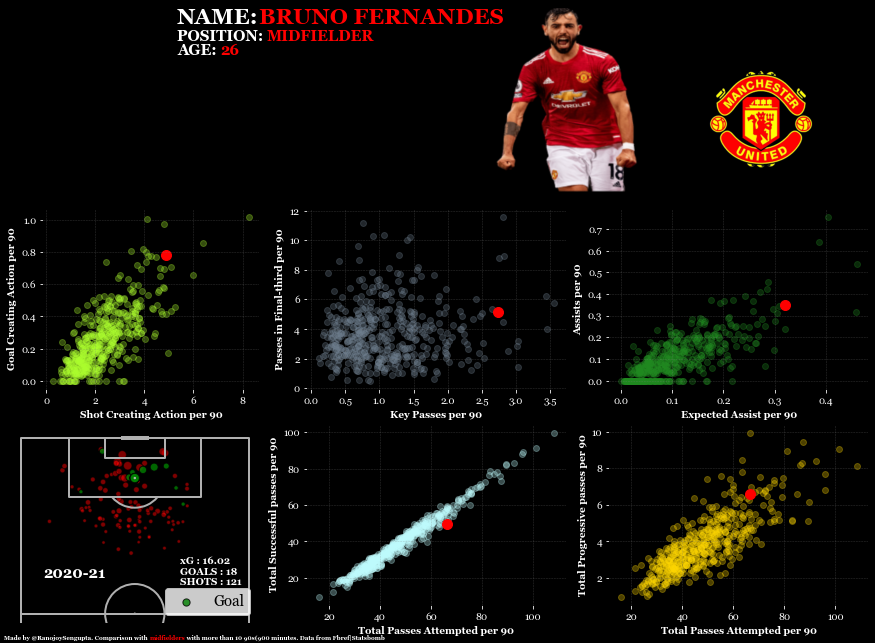

In [24]:
import seaborn as sns
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
fig.set_facecolor(background)


#SETTING UP THE MPL AXIS FOR THE SEASON
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta',line_zorder=3,pitch_color='#000000')
ax_opta1 = fig.add_axes((0.001, 0.025, 0.3, 0.27))
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax=ax_opta1)

#PLOTTING OTHER SHOTS
df_fil = df.loc[df['season']==2020]

pitch.scatter(df_fil[df_fil['result']!='Goal']['x'],df_fil[df_fil['result']!='Goal']['y'], 
              s=np.sqrt(df_fil[df_fil['result']!='Goal']['xg'])*100, marker='o', alpha=0.5,
              edgecolor='black', facecolor='red', ax=ax_opta1)

#NOW PLOTTING THE GOALS IN THE 2020-21 SEASON
pitch.scatter(df_fil[df_fil['result']=='Goal']['x'],df_fil[df_fil['result']=='Goal']['y'], 
              s=np.sqrt(df_fil[df_fil['result']=='Goal']['xg'])*100, marker='o', alpha=0.8,
              edgecolor='black', facecolor='green', ax=ax_opta1, label='Goal')

# ADDING THE LEGEND
ax_opta1.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta1.text(30,61,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])), weight='bold', size=10)
ax_opta1.text(30,64,f"xG : {round(sum(df_fil['xg']),2)}", weight='bold', size=10)
ax_opta1.text(30,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=10)
ax_opta1.text(90, 60, '2020-21', weight='bold', size=15)




# Plotting the passes attempted vs completed
ax_scatter1 = fig.add_axes((0.35, 0.05, 0.3, 0.25))
ax_scatter1.patch.set_facecolor(background)

no_90s = 10
df_fil = df_fbref_pass[df_fbref_pass['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['MF','MF,FW'])]

x,y = (df_fil['Att_total']/df_fil['90s']).to_list(), (df_fil['Cmp_total']/df_fil['90s']).to_list()

ax_scatter1.scatter(x,y,alpha=0.3,c='#c0fdff')

# Filtering the player's data (Bruno Fernandes) 
df_player = df_fil[df_fil['Player']=='Bruno Fernandes']
ax_scatter1.scatter(df_player['Att_total']/df_player['90s'], df_player['Cmp_total']/df_player['90s'],s=100,c='red')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter1.grid(b = True, color ='grey',
            linestyle ='--', linewidth = 0.5,
            alpha = 0.4)
ax_scatter1.set_xlabel('Total Passes Attempted per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter1.set_ylabel('Total Successful passes per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))




# Plotting the passes attempted vs progressive passes
ax_scatter1 = fig.add_axes((0.7, 0.05, 0.3, 0.25))
ax_scatter1.patch.set_facecolor(background)

no_90s = 10
df_fil = df_fbref_pass[df_fbref_pass['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['MF','MF,FW'])]

x,y = (df_fil['Att_total']/df_fil['90s']).to_list(), (df_fil['Prog']/df_fil['90s']).to_list()

ax_scatter1.scatter(x,y,alpha=0.3,c='#FFD700')

# Filtering the player's data (Bruno Fernandes) 
df_player = df_fil[df_fil['Player']=='Bruno Fernandes']
ax_scatter1.scatter(df_player['Att_total']/df_player['90s'], df_player['Prog']/df_player['90s'],s=100, c='red')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter1.grid(b = True, color ='grey',
            linestyle ='--', linewidth = 0.5,
            alpha = 0.4)
ax_scatter1.set_xlabel('Total Passes Attempted per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter1.set_ylabel('Total Progressive passes per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))









# Plotting the expected assists per 90 vs assists per 90
ax_scatter = fig.add_axes([0.7,0.35,0.3,0.25])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref_pass[df_fbref_pass['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['MF','MF,FW'])]

x,y = (df_fil['xA']/df_fil['90s']).to_list(), (df_fil['Ast']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='forestgreen')

# Filtering the player's data (Bruno Fernandes) 
df_player = df_fil[df_fil['Player']=='Bruno Fernandes']
ax_scatter.scatter(df_player['xA']/df_player['90s'], df_player['Ast']/df_player['90s'],s=100, c='red')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='--', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Expected Assist per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Assists per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))



# Plotting the Key Passes per 90 vs Passes in final third per 90
ax_scatter = fig.add_axes([0.35,0.35,0.3,0.25])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref_pass[df_fbref_pass['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['MF','MF,FW'])]

x,y = (df_fil['KP']/df_fil['90s']).to_list(), (df_fil['Final-Third']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='#708090')

# Filtering the player's data (Bruno Fernandes) 
df_player = df_fil[df_fil['Player']=='Bruno Fernandes']
ax_scatter.scatter(df_player['KP']/df_player['90s'], df_player['Final-Third']/df_player['90s'],s=100, c='red')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='--', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Key Passes per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Passes in Final-third per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))






# Plotting the SCA per 90 vs GCA per 90
ax_scatter = fig.add_axes([0.045,0.35,0.25,0.25])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref_gca[df_fbref_gca['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['MF','MF,FW'])]

x,y = (df_fil['SCA']/df_fil['90s']).to_list(), (df_fil['GCA']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='#adff2f')

# Filtering the player's data (Bruno Fernandes) 
df_player = df_fil[df_fil['Player']=='Bruno Fernandes']
ax_scatter.scatter(df_player['SCA']/df_player['90s'], df_player['GCA']/df_player['90s'],s=100, c='red')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='--', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Shot Creating Action per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Goal Creating Action per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))









#Adding Bruno's image
ax_player = fig.add_axes([0.55,0.32,0.2,0.86])
ax_player.axis('off')
im = plt.imread('B.Fernandes.png')
ax_player.imshow(im)

# Adding titles
fig_text(0.2,0.88,"NAME:<BRUNO FERNANDES>",weight='heavy', size=22, highlight_textprops=[{'color':'red'}])
fig_text(0.2,0.85,'POSITION: <MIDFIELDER>',weight='bold', size=15, highlight_textprops=[{'color':'red'}])
fig_text(0.2,0.83,'AGE: <26>',weight='bold', size=15, highlight_textprops=[{'color':'red'}])


#Adding Club Logo
ax_team = fig.add_axes([0.8,0.45,0.15,0.55])
ax_team.axis('off')
im = plt.imread('MANUNITED.png')
ax_team.imshow(im)


# ADDING A FOOTER
fig_text(0,0.008,'Made by @RanojoySengupta. Comparison with <midfielders>'+
        ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes. Data from Fbref|Statsbomb',
        size=6, highlight_textprops=[{'color':'red'}], weight = 'bold')


#plt.savefig('Bruno_analysis.png',dpi=300,facecolor=background)